# Project: Health Insurance Cost Prediction

Dataset_link: https://www.kaggle.com/code/priyang/health-insurance-cost-prediction-using-ml/input?scriptVersionId=78467794

In [901]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [902]:
#importing dataset

ins = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\Naresh\DS and ML Projects\Data\Health Insurance\Health_insurance.csv')
print(ins.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [903]:
ins.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## EDA

In [905]:
ins.shape

(1338, 7)

In [906]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [907]:
#Descriptive Statistics Analysis
ins.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [908]:
#Checking for total null values by columns
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [909]:
#Checking for duplicate values
duplicates = ins.duplicated().value_counts()
print(duplicates)

False    1337
True        1
Name: count, dtype: int64


In [910]:
#removing duplicate value
ins.drop_duplicates(inplace = True)

In [911]:
ins.shape

(1337, 7)

In [912]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [913]:
ins.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [914]:
ins['age'].value_counts().sort_index(ascending = True)

age
18    69
19    67
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: count, dtype: int64

In [915]:
ins['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [916]:
ins[['sex','children']].value_counts()

sex     children
female  0           289
male    0           284
        1           166
female  1           158
male    2           121
female  2           119
male    3            80
female  3            77
male    4            14
female  4            11
male    5            10
female  5             8
Name: count, dtype: int64

In [917]:
ins[['sex', 'region']].value_counts().sort_index()

sex     region   
female  northeast    161
        northwest    164
        southeast    175
        southwest    162
male    northeast    163
        northwest    160
        southeast    189
        southwest    163
Name: count, dtype: int64

In [918]:
ins[['smoker', 'region']].value_counts()

smoker  region   
no      southeast    273
        southwest    267
        northwest    266
        northeast    257
yes     southeast     91
        northeast     67
        northwest     58
        southwest     58
Name: count, dtype: int64

In [919]:
ins[['smoker', 'age']].value_counts()

smoker  age
no      18     57
        19     49
        21     26
        41     25
        28     25
               ..
yes     55      2
        41      2
        38      2
        21      2
        58      1
Name: count, Length: 94, dtype: int64

In [920]:
ins['charges'] = round(ins['charges'], 2)
ins['charges']

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.94
1337    29141.36
Name: charges, Length: 1337, dtype: float64

## Vizualization

In [922]:
sex = ins['sex'].value_counts()
print(sex)

sex
male      675
female    662
Name: count, dtype: int64


In [923]:
smoker = ins['smoker'].value_counts()
print(smoker)

smoker
no     1063
yes     274
Name: count, dtype: int64


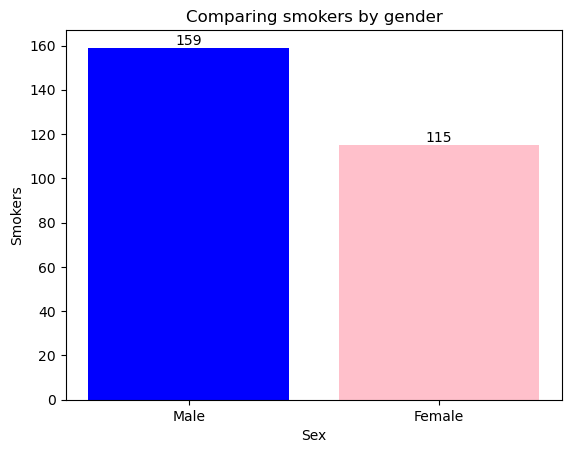

In [924]:
#Visualizing the comparision of 'sex and smoker' columns
male_smokers = ins[(ins['sex'] == 'male') & (ins['smoker'] == 'yes')].shape[0]
female_smokers = ins[(ins['sex'] == 'female') & (ins['smoker'] == 'yes')].shape[0]


gender = ['Male', 'Female']
smokers = [male_smokers, female_smokers]

plt.bar(gender, smokers, color = ['blue', 'pink'])
plt.title('Comparing smokers by gender')
plt.xlabel('Sex')
plt.ylabel('Smokers')

for i, count in enumerate(smokers):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

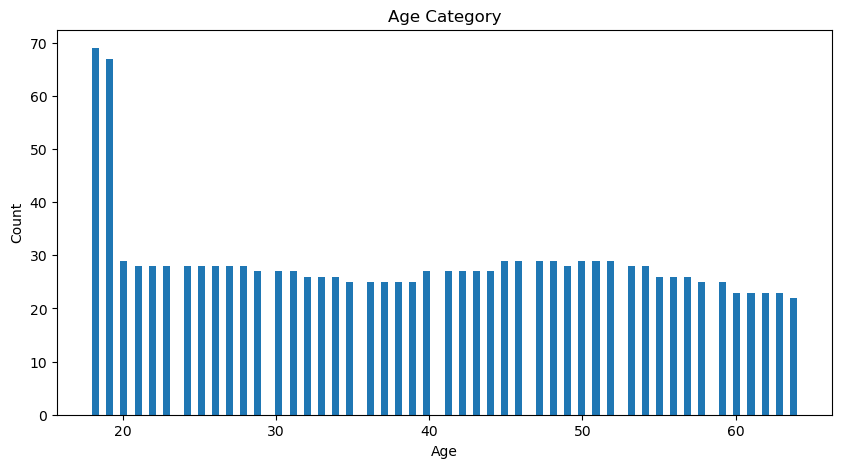

In [925]:
#Vizualize the age category and count using histogram plot

age = ins['age'].value_counts().sort_index(ascending = True)

plt.figure(figsize = (10,5))
plt.hist(ins['age'], bins = 100)
plt.title('Age Category')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show

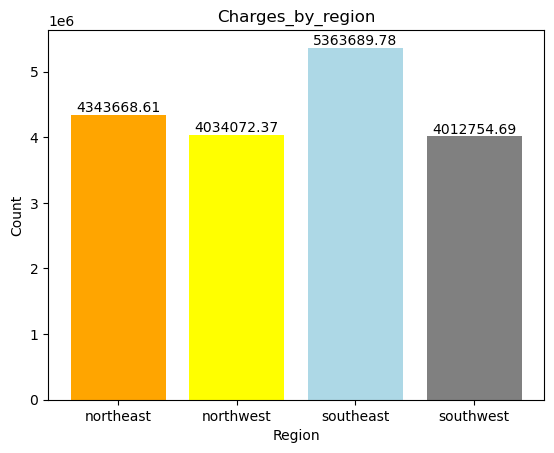

In [926]:
charges_by_region = ins.groupby('region')['charges'].sum()

plt.bar(charges_by_region.index, charges_by_region.values, color=['orange', 'yellow', 'lightblue', 'gray'])
plt.title('Charges_by_region')
plt.xlabel('Region')
plt.ylabel('Count')

for i, count in enumerate(charges_by_region):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

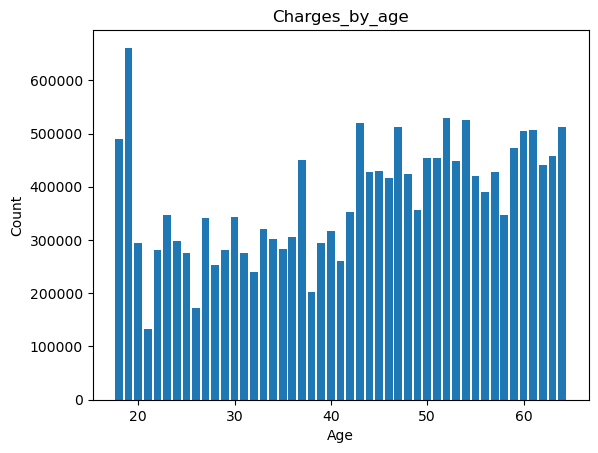

In [927]:
charges_by_age = ins.groupby('age')['charges'].sum()

plt.bar(charges_by_age.index, charges_by_age.values)
plt.title('Charges_by_age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

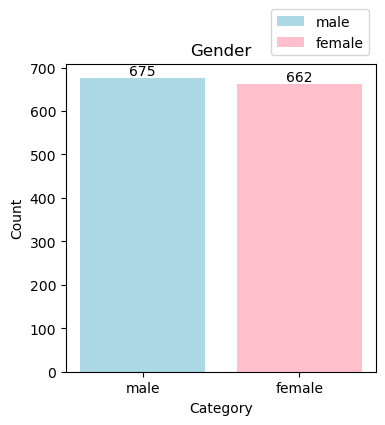

In [928]:
gender = ins['sex'].value_counts()

plt.figure(figsize = (4,4))
plt.bar(gender.index, gender.values, color=['lightblue', 'pink'], label = ["male", "female"])
plt.title('Gender')
plt.legend(["male", "female"], bbox_to_anchor = (1, 1.2))
plt.xlabel('Category')
plt.ylabel('Count')

for i, count in enumerate(gender):
    plt.text(i, count, str(count), ha='center', va='bottom')


plt.show()

sex        female  male
region                 
northeast     161   163
northwest     164   160
southeast     175   189
southwest     162   163


<Figure size 1000x1000 with 0 Axes>

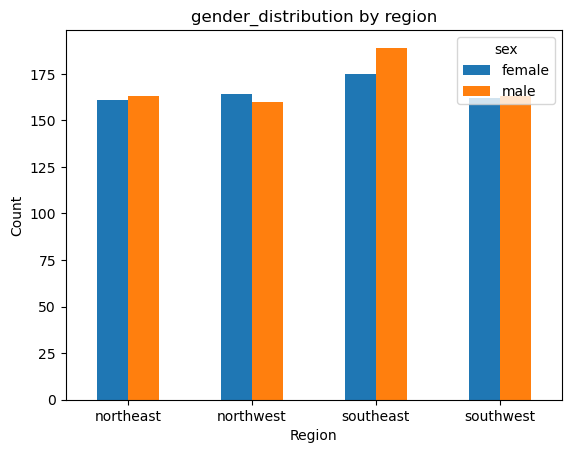

In [929]:
gender_distribution = ins.groupby(['region', 'sex']).size().unstack()
print(gender_distribution)

plt.figure(figsize = (10,10))
gender_distribution.plot(kind = 'bar', stacked = False)
plt.title('gender_distribution by region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation = 0)

plt.show()

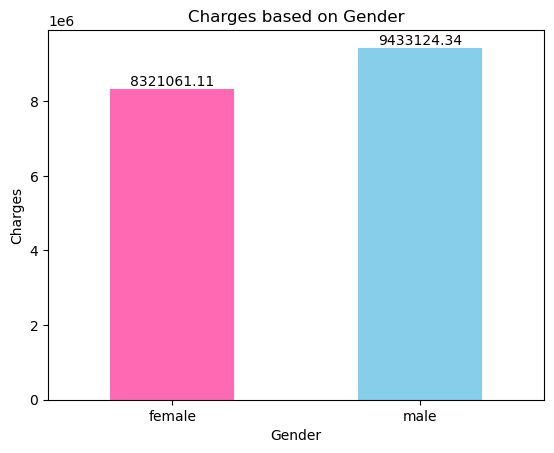

In [930]:
#Charges based on gender

charges_for_gender = ins.groupby('sex')['charges'].sum()


charges_for_gender.plot(kind = 'bar', color = ['hotpink', 'skyblue'])
plt.title('Charges based on Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.xticks(rotation = 0)

for i, count in enumerate(charges_for_gender):
    plt.text(i, count, str(count), ha = 'center', va = 'bottom')

plt.show()

### Converting categorical values

In [932]:
print(ins.head())

   age     sex     bmi  children smoker     region   charges
0   19  female  27.900         0    yes  southwest  16884.92
1   18    male  33.770         1     no  southeast   1725.55
2   28    male  33.000         3     no  southeast   4449.46
3   33    male  22.705         0     no  northwest  21984.47
4   32    male  28.880         0     no  northwest   3866.86


In [933]:
gender_conversion = {'female': '0', 'male': '1'}
ins['sex'] = ins['sex'].map(gender_conversion)

smokers_conversion = {'no': '0', 'yes': '1'}
ins['smoker'] = ins['smoker'].map(smokers_conversion)

region_conversion = {'southwest': '1', 'southeast': '2', 'northwest': '3', 'northeast': '4'}
ins['region'] = ins['region'].map(region_conversion)

print(ins.head())

   age sex     bmi  children smoker region   charges
0   19   0  27.900         0      1      1  16884.92
1   18   1  33.770         1      0      2   1725.55
2   28   1  33.000         3      0      2   4449.46
3   33   1  22.705         0      0      3  21984.47
4   32   1  28.880         0      0      3   3866.86


In [934]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92
1,18,1,33.770,1,0,2,1725.55
2,28,1,33.000,3,0,2,4449.46
3,33,1,22.705,0,0,3,21984.47
4,32,1,28.880,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.55
1334,18,0,31.920,0,0,4,2205.98
1335,18,0,36.850,0,0,2,1629.83
1336,21,0,25.800,0,0,1,2007.94


In [935]:
ins[['sex', 'smoker', 'region']] = ins[['sex', 'smoker', 'region']].astype(int)

ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


In [936]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92
1,18,1,33.770,1,0,2,1725.55
2,28,1,33.000,3,0,2,4449.46
3,33,1,22.705,0,0,3,21984.47
4,32,1,28.880,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.55
1334,18,0,31.920,0,0,4,2205.98
1335,18,0,36.850,0,0,2,1629.83
1336,21,0,25.800,0,0,1,2007.94


### Correlation

In [938]:
ins.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,-0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,-0.004936,0.058045
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,-0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,-0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.002358,0.787234
region,-0.001626,-0.004936,-0.157574,-0.016258,0.002358,1.000000,0.006547
charges,0.298308,0.058045,0.198401,0.067389,0.787234,0.006547,1.000000


## Spliting a model for Training and Testing

In [940]:
#Determine feature and Target variable

X = ins[['age', 'sex', 'smoker', 'region', 'bmi', 'children']]
y = ins['charges']

print('X\n_______________________________________\n',X.head(), '\n\ny\n_______________________________________\n',y.head())

X
_______________________________________
    age  sex  smoker  region     bmi  children
0   19    0       1       1  27.900         0
1   18    1       0       2  33.770         1
2   28    1       0       2  33.000         3
3   33    1       0       3  22.705         0
4   32    1       0       3  28.880         0 

y
_______________________________________
 0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64


In [941]:
#split the model for training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

## Linear Regression 

In [943]:
#train the model using Linear regression 

#Linear Regression Algorithm
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

#Linear Regression Prediction
linear_reg_y_pred = linear_regression.predict(X_test)
print('r2_score for linear_reg: ', r2_score(y_test, linear_reg_y_pred))

r2_score for linear_reg:  0.8068466310629683


## Ridge Regression (L1)

In [945]:
#Ridge Regression Algorithm

Rreg = linear_model.Ridge(alpha = .5)
Rreg.fit(X_train, y_train)

#Ridge Regression prediction
Rreg_y_pred = Rreg.predict(X_test)
print('r2_score for Ridge Regression model: ', r2_score(y_test, Rreg_y_pred))

# #Ridge Regression plot
# plt.figure(figsize = (10,6))
# plt.scatter(y_test, Rreg_y_pred, color = 'green', label = 'Linear Regression')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', ls = '--')
# plt.title('Linear_Regression: Actual vs Prediction')
# plt.xlabel('Actual')
# plt.ylabel('Predict')
# plt.show()

r2_score for Ridge Regression model:  0.8063759555698343


## Baysian Regression

In [947]:
#Baysian Regression Algorithm

Breg = linear_model.BayesianRidge()
Breg.fit(X_train,y_train)

#Baysian Regression predict
Breg_y_pred = Breg.predict(X_test)
print('r2_score for Baysian Regression model: ', r2_score(y_test, Breg_y_pred))

r2_score for Baysian Regression model:  0.8064502073131099


## Lasso Regression (L2)

In [949]:
#Lasso Regression Algorithm
Lasso_reg = linear_model.Lasso(alpha = .5)
Lasso_reg.fit(X_train,y_train)

#Baysian Regression predict
Lasso_y_pred = Lasso_reg.predict(X_test)
print('r2_score for Lasso Regression model: ', r2_score(y_test, Lasso_y_pred))

r2_score for Lasso Regression model:  0.806821307513902


## Elastic Net Regression

In [951]:
#Elastic Net Regression
Enet_reg = linear_model.ElasticNet(alpha=0.5, l1_ratio = .5)
Enet_reg.fit(X_train,y_train)

#Elastic Net Regression predict
Enet_y_pred = Enet_reg.predict(X_test)
print('r2_score for Elastic net Regression model: ', r2_score(y_test, Enet_y_pred))

r2_score for Elastic net Regression model:  0.5208047885505721


## SVM Regressor

In [953]:
#SVM Regression
svm_reg = SVR()
svm_reg.fit(X_train, y_train)

svm_y_pred = svm_reg.predict(X_test)
print('r2_score for SVM Regressor model: ', r2_score(y_test, svm_y_pred))

r2_score for SVM Regressor model:  -0.13444604801807736


## Random Forest Regressor

In [955]:
#Random Forest Regressor
rand_reg = RandomForestRegressor()
rand_reg.fit(X_train, y_train)

rand_y_pred = rand_reg.predict(X_test)
print('r2_score for Random Forest Regressor model: ', r2_score(y_test, rand_y_pred))

r2_score for Random Forest Regressor model:  0.8799656790185576


## Gradient Boosting Regressor

In [957]:
#Gradient Boosting Regressor
grad_reg = GradientBoostingRegressor()
grad_reg.fit(X_train, y_train)

grad_y_pred = grad_reg.predict(X_test)
print('r2_score for Gradient Boosting Regressor model: ', r2_score(y_test, grad_y_pred))

r2_score for Gradient Boosting Regressor model:  0.8987933049544586


## Actual and Predicted value based on different models

In [959]:
df = pd.DataFrame({"Actual": y_test, "LR": linear_reg_y_pred, "RR": Rreg_y_pred,
                  "BR": Breg_y_pred, "Lasso": Lasso_y_pred, "EN": Enet_y_pred, 
                  "SVM": svm_y_pred, "RF": rand_y_pred, "GBR": grad_y_pred})

df[["LR","RR","BR","Lasso","EN","SVM","RF","GBR"]] = round(df[["LR","RR","BR","Lasso","EN","SVM","RF","GBR"]],2)
df

,Actual,LR,RR,BR,Lasso,EN,SVM,RF,GBR
900,8688.86,8080.45,8095.92,8093.50,8082.19,11106.07,9285.08,9689.24,10503.53
1064,5708.87,5592.87,5606.15,5604.07,5592.30,8450.77,9160.06,6270.73,7231.16
1256,11436.74,14378.30,14388.54,14386.94,14376.71,16621.35,9304.09,12691.80,13518.52
298,38746.36,31731.82,31680.55,31688.58,31729.24,20739.94,9173.36,42266.05,38985.41
237,4463.21,9158.36,9174.33,9171.83,9159.75,12213.64,9176.21,6463.88,6291.92
...,...,...,...,...,...,...,...,...,...
534,13831.12,16952.68,16965.68,16963.64,16954.63,19490.72,9364.07,14295.48,13890.36
542,13887.20,15496.91,15505.65,15504.28,15496.75,17610.90,9363.49,14140.66,14407.86
760,3925.76,6303.39,6315.36,6313.48,6301.74,8958.50,9133.97,11330.52,7447.37
1284,47403.88,38248.33,38194.56,38202.98,38247.23,26870.26,9356.15,47908.86,49312.34


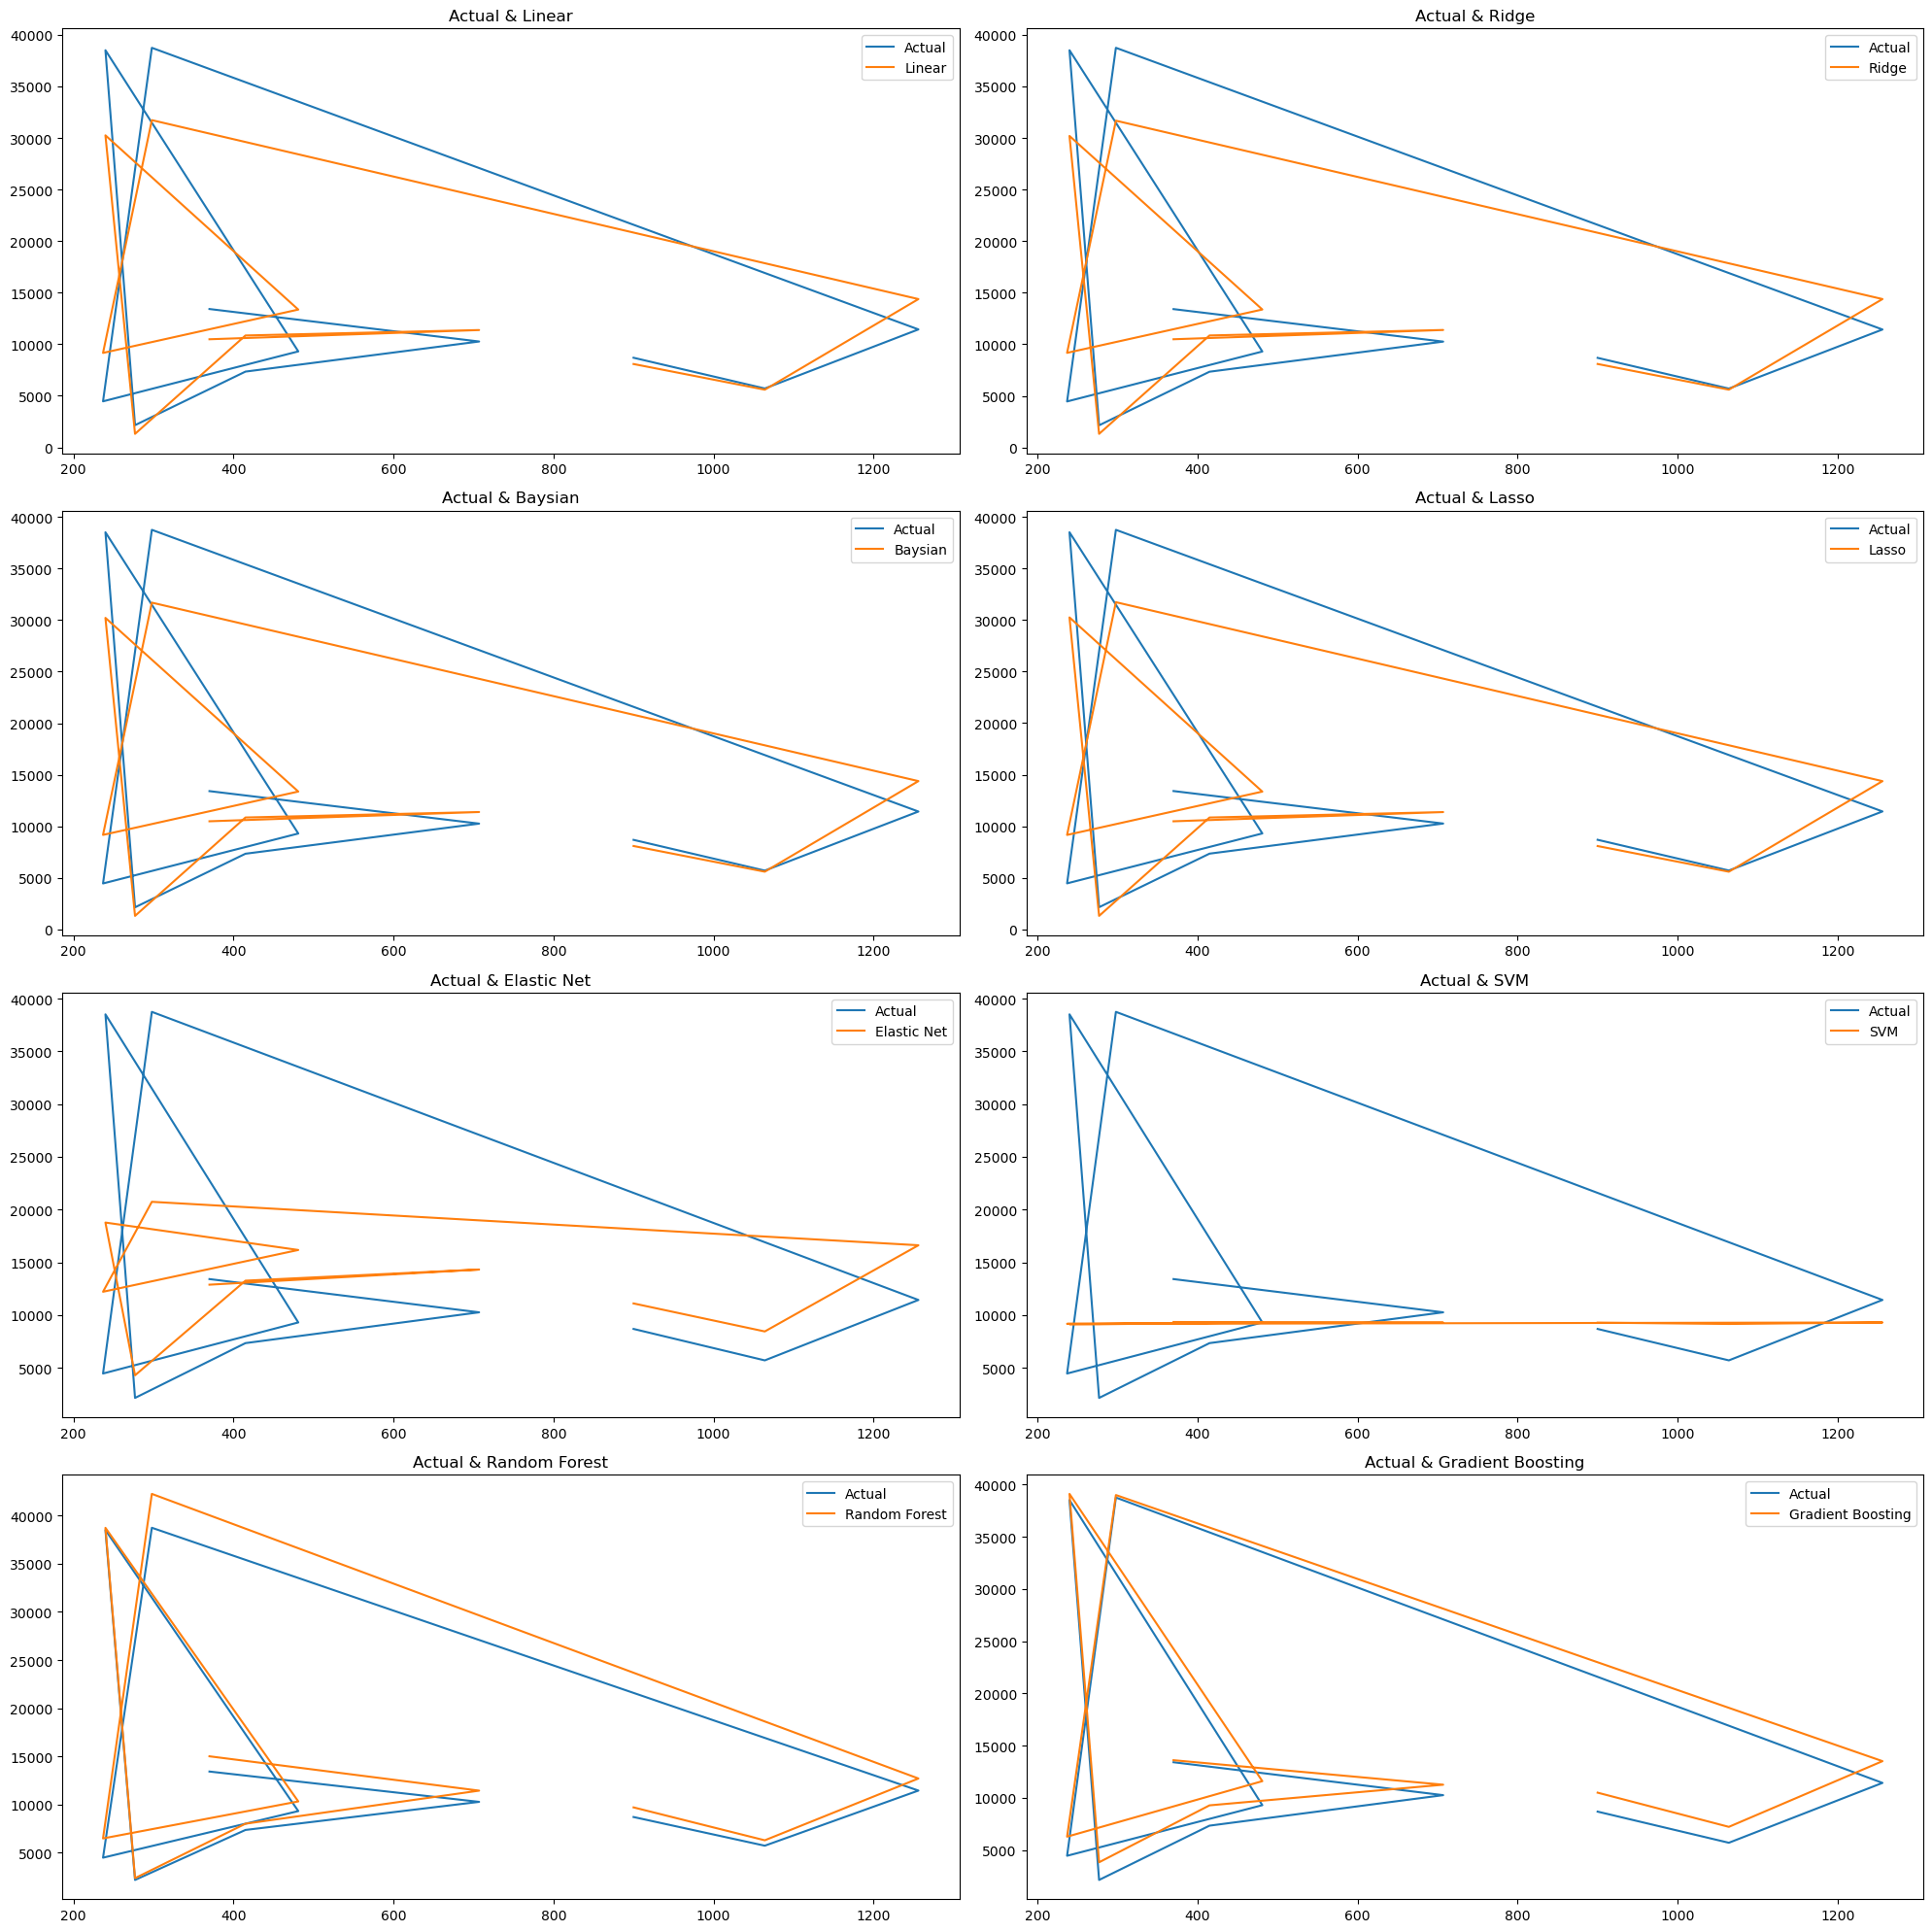

In [960]:
plt.figure(figsize = (20, 20))

plt.subplot(421)
plt.plot(df["Actual"].iloc[0:11], label = "Actual")
plt.plot(df["LR"].iloc[0:11], label = "Linear")
plt.legend()
plt.title("Actual & Linear")

plt.subplot(422)
plt.plot(df["Actual"].iloc[0:11], label = "Actual")
plt.plot(df["RR"].iloc[0:11], label = "Ridge")
plt.legend()
plt.title("Actual & Ridge")

plt.subplot(423)
plt.plot(df["Actual"].iloc[0:11], label = "Actual")
plt.plot(df["BR"].iloc[0:11], label = "Baysian")
plt.legend()
plt.title("Actual & Baysian")

plt.subplot(424)
plt.plot(df["Actual"].iloc[0:11], label = "Actual")
plt.plot(df["Lasso"].iloc[0:11], label = "Lasso")
plt.legend()
plt.title("Actual & Lasso")

plt.subplot(425)
plt.plot(df["Actual"].iloc[0:11], label = "Actual")
plt.plot(df["EN"].iloc[0:11], label = "Elastic Net")
plt.legend()
plt.title("Actual & Elastic Net")

plt.subplot(426)
plt.plot(df["Actual"].iloc[0:11], label = "Actual")
plt.plot(df["SVM"].iloc[0:11], label = "SVM")
plt.legend()
plt.title("Actual & SVM")

plt.subplot(427)
plt.plot(df["Actual"].iloc[0:11], label = "Actual")
plt.plot(df["RF"].iloc[0:11], label = "Random Forest")
plt.legend()
plt.title("Actual & Random Forest")

plt.subplot(428)
plt.plot(df["Actual"].iloc[0:11], label = "Actual")
plt.plot(df["GBR"].iloc[0:11], label = "Gradient Boosting")
plt.legend()
plt.title("Actual & Gradient Boosting")

plt.tight_layout()

## Overall r2 Scores for different regressions

In [962]:
print('r2_score for linear_reg: ', round(r2_score(y_test, linear_reg_y_pred),2))
print('r2_score for Ridge Regression model: ', round(r2_score(y_test, Rreg_y_pred),2))
print('r2_score for Baysian Regression model: ', round(r2_score(y_test, Breg_y_pred),2))
print('r2_score for Lasso Regression model: ', round(r2_score(y_test, Lasso_y_pred),2))
print('r2_score of Elastic net Regression model: ', round(r2_score(y_test, Enet_y_pred),2))
print('r2_score of SVM Regressor model: ', round(r2_score(y_test, svm_y_pred),2))
print('r2_score of Random Forest Regressor model: ', round(r2_score(y_test, rand_y_pred),2))
print('r2_score of Gradient Boosting Regressor model: ', round(r2_score(y_test, grad_y_pred),2))

r2_score for linear_reg:  0.81
r2_score for Ridge Regression model:  0.81
r2_score for Baysian Regression model:  0.81
r2_score for Lasso Regression model:  0.81
r2_score of Elastic net Regression model:  0.52
r2_score of SVM Regressor model:  -0.13
r2_score of Random Forest Regressor model:  0.88
r2_score of Gradient Boosting Regressor model:  0.9


## Overall MAE Score

In [964]:
print('MAE of Linear Regression: ', round(mean_absolute_error(y_test, linear_reg_y_pred),2))
print('MAE of Ridge Regression model: ', round(mean_absolute_error(y_test, Rreg_y_pred),2))
print('MAE of Baysian Regression model: ', round(mean_absolute_error(y_test, Breg_y_pred),2))
print('MAE of Lasso Regression model: ', round(mean_absolute_error(y_test, Lasso_y_pred),2))
print('MAE of Elastic net Regression model: ', round(mean_absolute_error(y_test, Enet_y_pred),2))
print('MAE of SVM Regressor model: ', round(mean_absolute_error(y_test, svm_y_pred),2))
print('MAE of Random Forest Regressor model: ', round(mean_absolute_error(y_test, rand_y_pred),2))
print('MAE of Gradient Boosting Regressor model: ', round(mean_absolute_error(y_test, grad_y_pred),2))

MAE of Linear Regression:  4182.35
MAE of Ridge Regression model:  4190.3
MAE of Baysian Regression model:  4189.06
MAE of Lasso Regression model:  4182.7
MAE of Elastic net Regression model:  6801.2
MAE of SVM Regressor model:  9249.56
MAE of Random Forest Regressor model:  2620.5
MAE of Gradient Boosting Regressor model:  2554.83


## Predict with new data using the best model

In [966]:
new_data = {"age": 60,
           "sex": 0,
            "smoker": 1,
            "region": 3,
           "bmi": 35,
           "children": 2}

df1 = pd.DataFrame(new_data, index = [0])
df1

,age,sex,smoker,region,bmi,children
0,60,0,1,3,35,2


In [967]:
new_pred = grad_reg.predict(df1)
new_pred

array([47230.99817173])

## Save the best model for deployment

In [969]:
#Gradient Boosting Regressor
grad_reg = GradientBoostingRegressor()
grad_reg.fit(X, y)

GradientBoostingRegressor()

In [970]:
import joblib

joblib.dump(grad_reg, "grad_model")

['grad_model']

In [971]:
new = joblib.load('grad_model')

new.predict(df1)

array([46769.79786486])